In [1]:
from fastai.vision.all import *
from fastbook import *

In [2]:
matplotlib.rc('image', cmap='Greys')

# Mathematical classifier

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
path

Path('/home/agastya/.fastai/data/mnist_png')

In [5]:
path.ls()

(#2) [Path('/home/agastya/.fastai/data/mnist_png/testing'),Path('/home/agastya/.fastai/data/mnist_png/training')]

In [6]:
train = path/'training'
valid = path/'testing'
train.ls()

(#10) [Path('/home/agastya/.fastai/data/mnist_png/training/7'),Path('/home/agastya/.fastai/data/mnist_png/training/3'),Path('/home/agastya/.fastai/data/mnist_png/training/1'),Path('/home/agastya/.fastai/data/mnist_png/training/2'),Path('/home/agastya/.fastai/data/mnist_png/training/6'),Path('/home/agastya/.fastai/data/mnist_png/training/8'),Path('/home/agastya/.fastai/data/mnist_png/training/4'),Path('/home/agastya/.fastai/data/mnist_png/training/0'),Path('/home/agastya/.fastai/data/mnist_png/training/9'),Path('/home/agastya/.fastai/data/mnist_png/training/5')]

In [7]:
train_digits = { 
'zeros' : train/'0',
'ones' : train/'1',
'twos' : train/'2',
'threes' : train/'3',
'fours' : train/'4',
'fives' : train/'5',
'sixes' : train/'6',
'sevens' : train/'7',
'eights' : train/'8',
'nines' : train/'9',
}

In [8]:
train_digits_tensor = {}
for digit, path in train_digits.items():
    train_digits_tensor[digit + '_tensor'] = [tensor(Image.open(o)) for o in path.ls().sorted()]

In [9]:
# Contains list images 
for key, item in train_digits_tensor.items():
    print(key, len(item))

zeros_tensor 5923
ones_tensor 6742
twos_tensor 5958
threes_tensor 6131
fours_tensor 5842
fives_tensor 5421
sixes_tensor 5918
sevens_tensor 6265
eights_tensor 5851
nines_tensor 5949


`train_digit_tensor` contains list of images as tensor
We are now converting the list into tensor ie stacking

In [10]:
train_digits_stacked = {}
for digit, digitTensorList in train_digits_tensor.items():
    stacked_tensor = torch.stack(digitTensorList).float()/255
    train_digits_stacked[digit + '_stacked'] = stacked_tensor
    print(digit + '_stacked', stacked_tensor.shape) 

zeros_tensor_stacked torch.Size([5923, 28, 28])
ones_tensor_stacked torch.Size([6742, 28, 28])
twos_tensor_stacked torch.Size([5958, 28, 28])
threes_tensor_stacked torch.Size([6131, 28, 28])
fours_tensor_stacked torch.Size([5842, 28, 28])
fives_tensor_stacked torch.Size([5421, 28, 28])
sixes_tensor_stacked torch.Size([5918, 28, 28])
sevens_tensor_stacked torch.Size([6265, 28, 28])
eights_tensor_stacked torch.Size([5851, 28, 28])
nines_tensor_stacked torch.Size([5949, 28, 28])


dict_keys(['zeros_mean', 'ones_mean', 'twos_mean', 'threes_mean', 'fours_mean', 'fives_mean', 'sixes_mean', 'sevens_mean', 'eights_mean', 'nines_mean'])


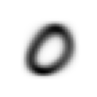

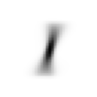

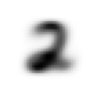

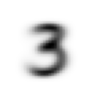

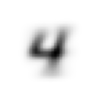

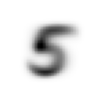

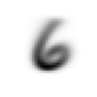

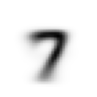

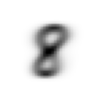

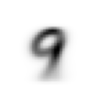

In [11]:
mean_digits = {}
for digit, stackedTensor in train_digits_stacked.items():
    digit = digit.removesuffix('_tensor_stacked') + '_mean'
    meanTensor = stackedTensor.mean(0)
    show_image(meanTensor)
    mean_digits[digit] = meanTensor
print(mean_digits.keys())

## Calculating loss

<Axes: >

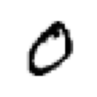

In [12]:
a_0 = train_digits_tensor['zeros_tensor'][0]
show_image(a_0)

In [13]:
for digit in mean_digits.keys():
    print(f'loss compared to {digit}', F.l1_loss(a_0, mean_digits[digit]))

loss compared to zeros_mean tensor(39.5873)
loss compared to ones_mean tensor(39.6624)
loss compared to twos_mean tensor(39.6678)
loss compared to threes_mean tensor(39.6530)
loss compared to fours_mean tensor(39.6684)
loss compared to fives_mean tensor(39.6382)
loss compared to sixes_mean tensor(39.6522)
loss compared to sevens_mean tensor(39.6595)
loss compared to eights_mean tensor(39.6572)
loss compared to nines_mean tensor(39.6610)


tensor(15.4093)
tensor(15.2817)
tensor(15.3713)
tensor(15.3606)
tensor(15.3748)
tensor(15.3600)
tensor(15.3597)
tensor(15.3581)
tensor(15.3549)
tensor(15.3598)


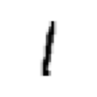

In [14]:
a_1 = train_digits_tensor['ones_tensor'][0]
show_image(a_1)
for digit in mean_digits.keys():
    print(F.l1_loss(a_1, mean_digits[digit]))

tensor(36.4215)
tensor(36.3746)
tensor(36.3967)
tensor(36.3602)
tensor(36.4164)
tensor(36.3876)
tensor(36.4057)
tensor(36.3991)
tensor(36.3828)
tensor(36.3946)


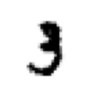

In [15]:
a_3 = train_digits_tensor['threes_tensor'][0]
show_image(a_3)
for digit in mean_digits.keys():
    print(F.l1_loss(a_3, mean_digits[digit]))

In [16]:
torch.tensor([])

tensor([])

In [17]:
def predict(input):
    predictions = []
    for digit in mean_digits.keys():
        predictions.append(F.l1_loss(input, mean_digits[digit]))
    predictions = torch.stack(predictions)
    return torch.min(predictions).item(), torch.argmin(predictions).item()
predict(a_1)

(15.281706809997559, 1)

In [18]:
valid_digits = { 
'zeros' : valid/'0',
'ones' : valid/'1',
'twos' : valid/'2',
'threes' : valid/'3',
'fours' : valid/'4',
'fives' : valid/'5',
'sixes' : valid/'6',
'sevens' : valid/'7',
'eights' : valid/'8',
'nines' : valid/'9',
}

In [19]:
valid_digits_tensor = {}
for digit, path in valid_digits.items():
    valid_digits_tensor[digit+'_tensor'] = [tensor(Image.open(o)) for o in path.ls().sorted()]

In [20]:
valid_digits_stacked = {}
for digit, digitTensorList in valid_digits_tensor.items():
    stacked_tensor = torch.stack(digitTensorList).float()/255
    valid_digits_stacked[digit + '_stacked'] = stacked_tensor
    print(digit + '_stacked', stacked_tensor.shape) 

zeros_tensor_stacked torch.Size([980, 28, 28])
ones_tensor_stacked torch.Size([1135, 28, 28])
twos_tensor_stacked torch.Size([1032, 28, 28])
threes_tensor_stacked torch.Size([1010, 28, 28])
fours_tensor_stacked torch.Size([982, 28, 28])
fives_tensor_stacked torch.Size([892, 28, 28])
sixes_tensor_stacked torch.Size([958, 28, 28])
sevens_tensor_stacked torch.Size([1028, 28, 28])
eights_tensor_stacked torch.Size([974, 28, 28])
nines_tensor_stacked torch.Size([1009, 28, 28])


In [25]:
counter = 0
for i, digit in enumerate(valid_digits_stacked.items()):
    if i == predict(digit[1]):
        counter += 1
    print(i, digit[0], digit[1].shape)
counter

0 zeros_tensor_stacked torch.Size([980, 28, 28])
1 ones_tensor_stacked torch.Size([1135, 28, 28])
2 twos_tensor_stacked torch.Size([1032, 28, 28])
3 threes_tensor_stacked torch.Size([1010, 28, 28])
4 fours_tensor_stacked torch.Size([982, 28, 28])
5 fives_tensor_stacked torch.Size([892, 28, 28])
6 sixes_tensor_stacked torch.Size([958, 28, 28])
7 sevens_tensor_stacked torch.Size([1028, 28, 28])
8 eights_tensor_stacked torch.Size([974, 28, 28])
9 nines_tensor_stacked torch.Size([1009, 28, 28])


/tmp/ipykernel_23280/2243090946.py:4: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the input size (torch.Size([980, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  predictions.append(F.l1_loss(input, mean_digits[digit]))
/tmp/ipykernel_23280/2243090946.py:4: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the input size (torch.Size([1135, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  predictions.append(F.l1_loss(input, mean_digits[digit]))
/tmp/ipykernel_23280/2243090946.py:4: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the input size (torch.Size([1032, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  predictions.append(F.l1_loss(input, mean_digits[digit]))
/tmp/ipykernel_23280/2243090946.py:

0